# Author: Sijie (Stephanie) Wang, Yuhsin (Mia) Hou, FangJung (Kristy) Lin, Chachra Aastha

# Purpose: Hackathon 1

# Class: ALY 6015 - Hackathon 1

In [0]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# Load data

In [64]:
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSygt85A-C0wRp5ZQrWAF8LeaC-1eflhBzBCGhDf9gbvy5N8UbjOFFBv9lxOLnnxB1Kp8B4x-mBD3LP/pub?gid=278789607&single=true&output=csv"
df = pd.read_csv(data_path)
df.set_index('Id')

,SF,SalePrice
Id,,
1,4316,755000
2,4476,745000
3,3627,625000
4,2364,611657
5,2822,582933
...,...,...
1456,1317,40000
1457,334,39300
1458,968,37900


In [65]:
df.dtypes

Id           int64
SF           int64
SalePrice    int64
dtype: object

# Q1. What does the distribution of rents look like?


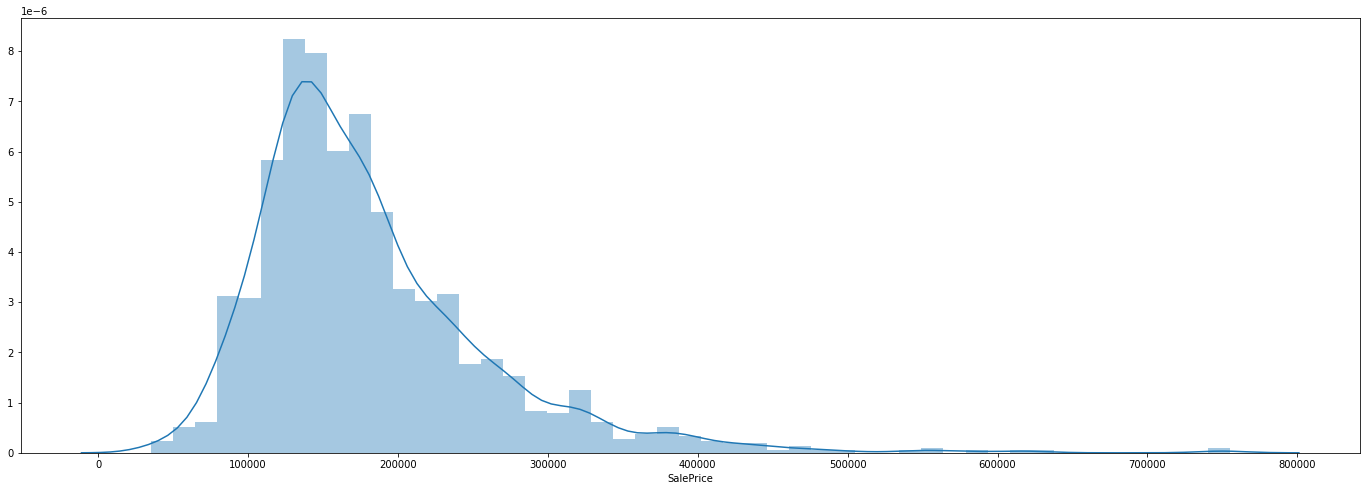

In [66]:
sns.distplot(df['SalePrice'])
plt.rcParams["figure.figsize"] = (24,8)

# Q2. Provide an estimate cost for a house with 1000 sq ft.

In [67]:
X = df[['SF']]
Y = df['SalePrice']
print(X)
 
# Split the data into testing data and training data. 
# Already from sklearn.model_selection import train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

X_train = np.asmatrix(X_train)
X_test = np.asmatrix(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

        SF
0     4316
1     4476
2     3627
3     2364
4     2822
...    ...
1455  1317
1456   334
1457   968
1458   480
1459   720

[1460 rows x 1 columns]


In [68]:
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
#Make predictions using the testing set
y_pred = regressor1.predict(X_test)

#Print a few predictions
print((pd.DataFrame(y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(regressor1.intercept_))

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, y_pred))

    y_prediction
0  180195.716846
1  179113.309872
2  152741.939978
3  220343.175491
4  155300.356460

Intercept: 31512.358971585345
Mean Squared Error (MSE):3327968392.40
Variance Score (R^2):0.57


In [70]:
regressor1.coef_

array([98.40063393])

In [71]:
result1 = regressor1.predict([[1000]])
print('Estimate cost for a house with 1000 sq ft: ' + str(result1[0]))

Estimate cost for a house with 1000 sq ft: 129912.99290541824


# Q3. How much sq. footage can $1,000,000 buy?

In [72]:
X = df[['SalePrice']]
Y = df['SF']
print(X)
 
# Split the data into testing data and training data. 
# Already from sklearn.model_selection import train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

X_train = np.asmatrix(X_train)
X_test = np.asmatrix(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

      SalePrice
0        755000
1        745000
2        625000
3        611657
4        582933
...         ...
1455      40000
1456      39300
1457      37900
1458      35311
1459      34900

[1460 rows x 1 columns]


In [73]:
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
#Make predictions using the testing set
y_pred = regressor2.predict(X_test)

#Print a few predictions
print((pd.DataFrame(y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(regressor2.intercept_))

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, y_pred))

   y_prediction
0   1530.016354
1   1553.476295
2   1574.590242
3   1756.310946
4   1471.366502

Intercept: 661.9985348105193
Mean Squared Error (MSE):106835.95
Variance Score (R^2):0.61


In [75]:
result2 = regressor2.predict([[1000000]])
print('Sq. footage can $1,000,000 buy: ' + str(result2[0]))

Sq. footage can $1,000,000 buy: 5353.986747510333


# Q4. What is your interpretation of the prices for houses in the 4000-5000 sq. footage range? 

In [76]:
range1 = regressor1.predict([[4000]])
range2 = regressor1.predict([[5000]])
print('Price Range:' + '(' + str(range1[0]) + ',' + str(range2[0]) + ')')

Price Range:(425114.89470691694,523515.5286407498)
